# Minor Project 1 - EDA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [7]:
df = pd.read_csv("/content/penguins.csv")

## Initial Analysis

In [8]:
print(df.head())

   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [12]:
print(df.describe())

               id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   171.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      0.000000       32.100000      13.100000         172.000000   
25%     85.750000       39.225000      15.600000         190.000000   
50%    171.500000       44.450000      17.300000         197.000000   
75%    257.250000       48.500000      18.700000         213.000000   
max    343.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000  


## Check for Duplicates

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None



## Outlier Detection and Correction






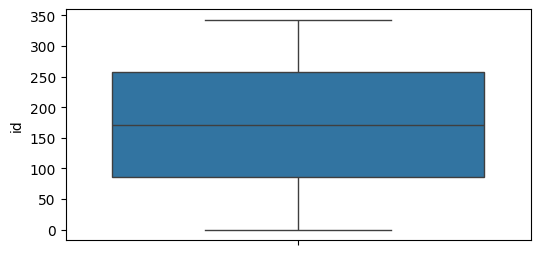

<Figure size 640x480 with 0 Axes>

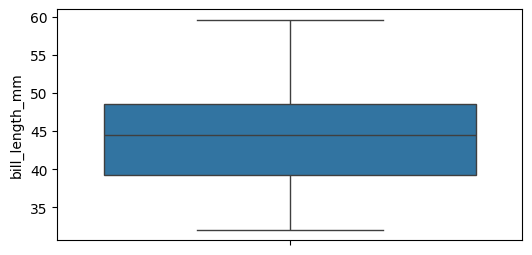

<Figure size 640x480 with 0 Axes>

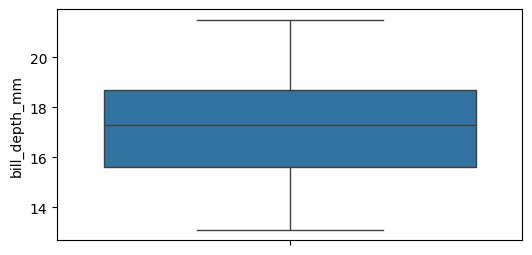

<Figure size 640x480 with 0 Axes>

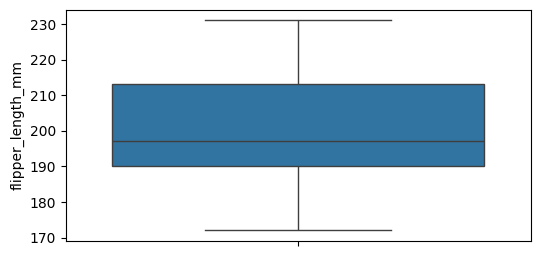

<Figure size 640x480 with 0 Axes>

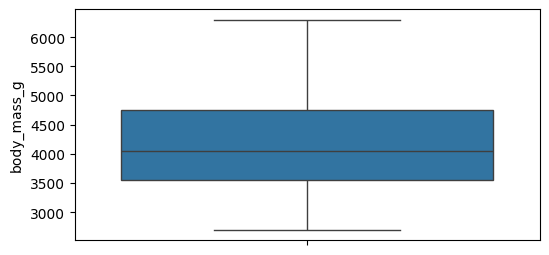

<Figure size 640x480 with 0 Axes>

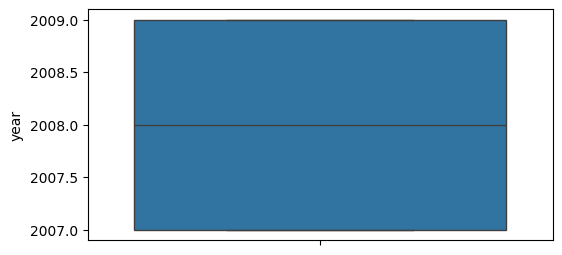

<Figure size 640x480 with 0 Axes>

In [17]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)


In [18]:
def outlier_correction(df, col, show_plot=True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

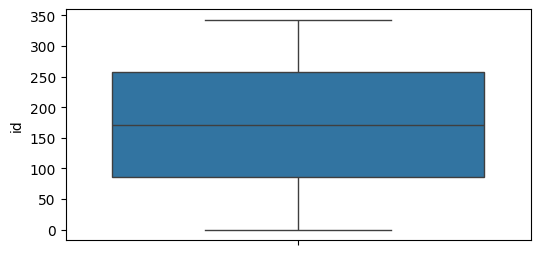

<Figure size 640x480 with 0 Axes>

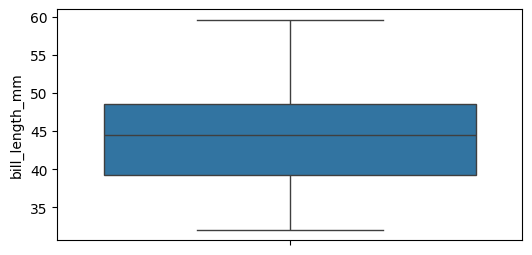

<Figure size 640x480 with 0 Axes>

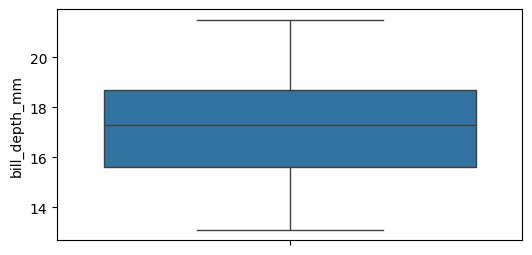

<Figure size 640x480 with 0 Axes>

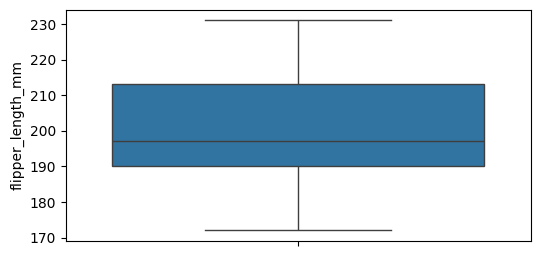

<Figure size 640x480 with 0 Axes>

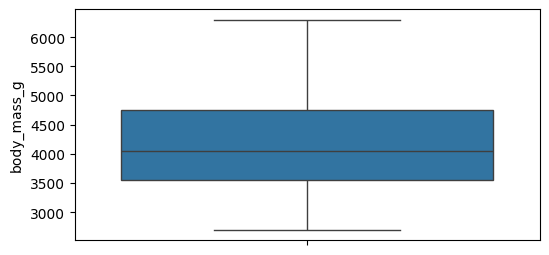

<Figure size 640x480 with 0 Axes>

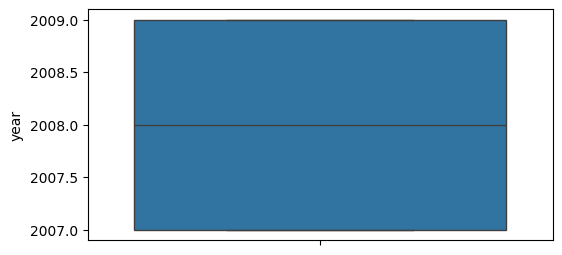

<Figure size 640x480 with 0 Axes>

In [19]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot=True)
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)

## Handling Missing Values

In [20]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-1156349246.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1156349246.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    float64
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    object 
 8   year               344 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.3+ KB
None


## Univariate Analysis

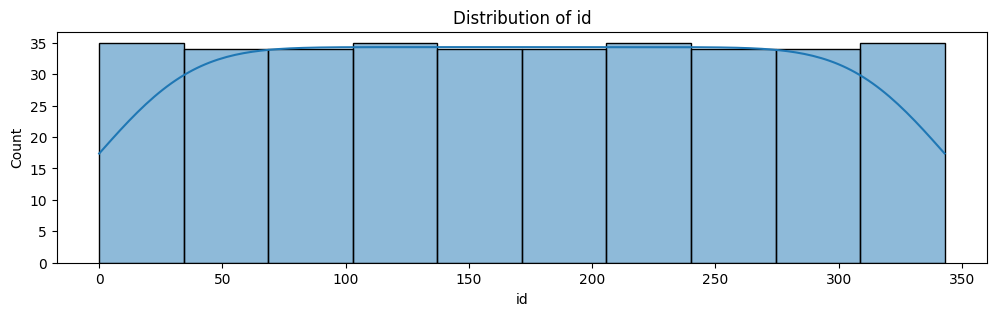

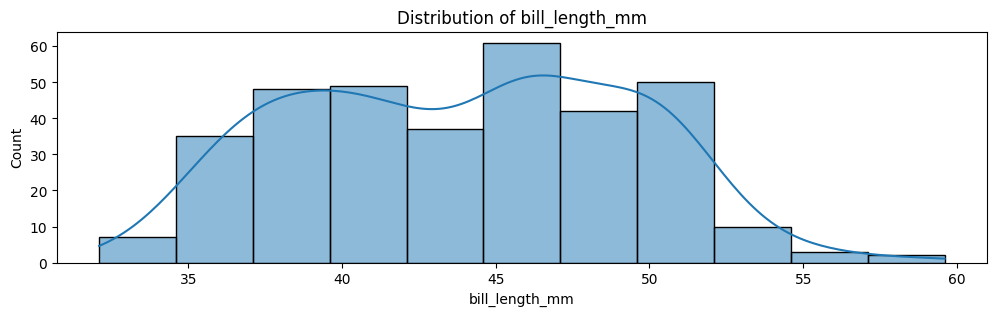

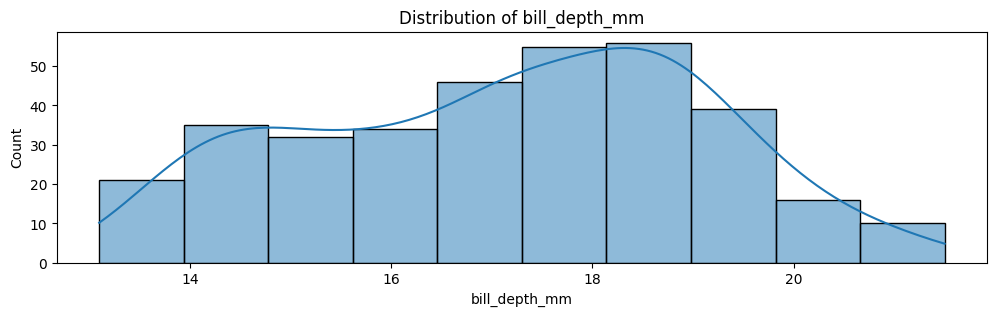

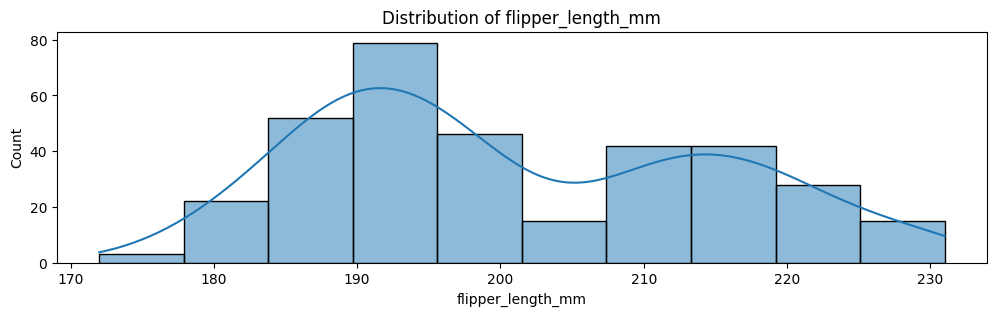

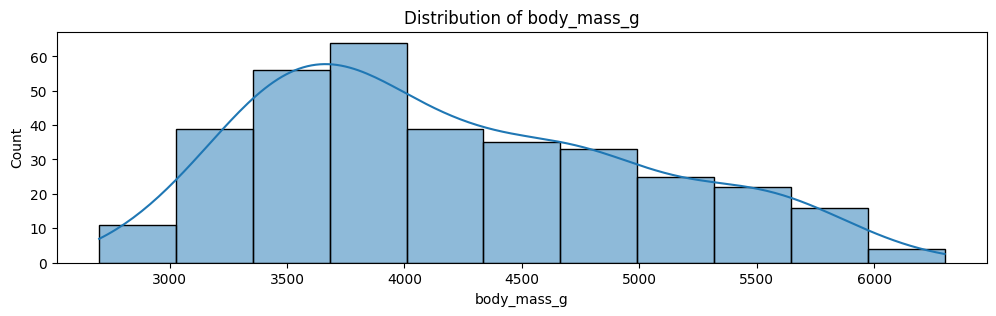

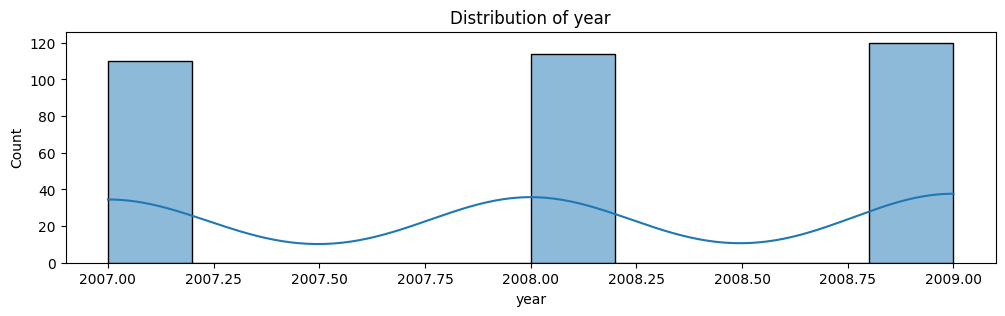

In [24]:
for col in df.select_dtypes(include=["float64", "int64"]).columns:
  plt.figure(figsize=(12,3))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

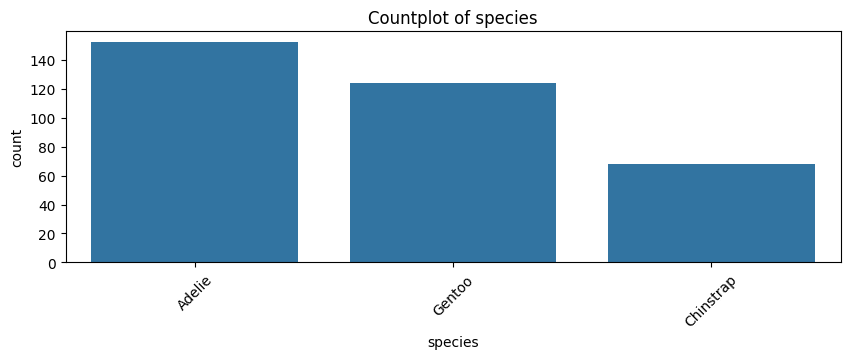

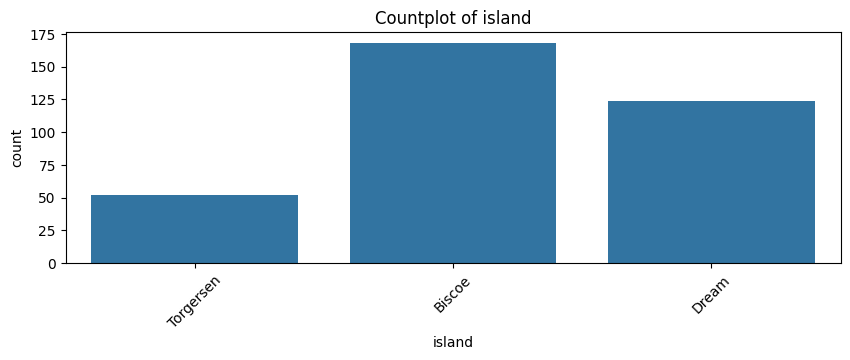

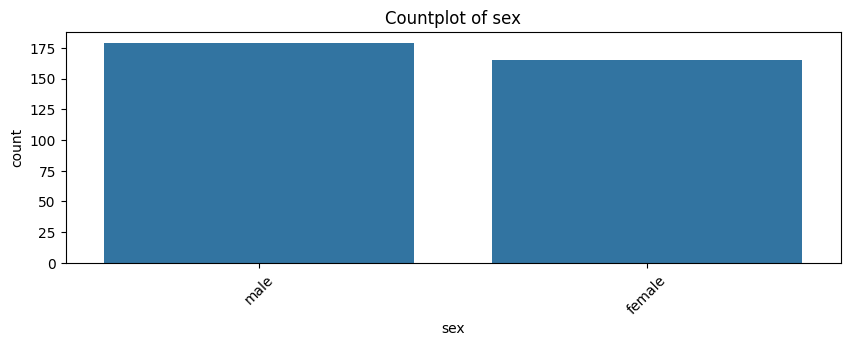

In [25]:
for col in df.select_dtypes(include=["object", "category"]).columns:
  plt.figure(figsize=(10,3))
  sns.countplot(x=df[col])
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)
  plt.show()

## Bivariate Analysis

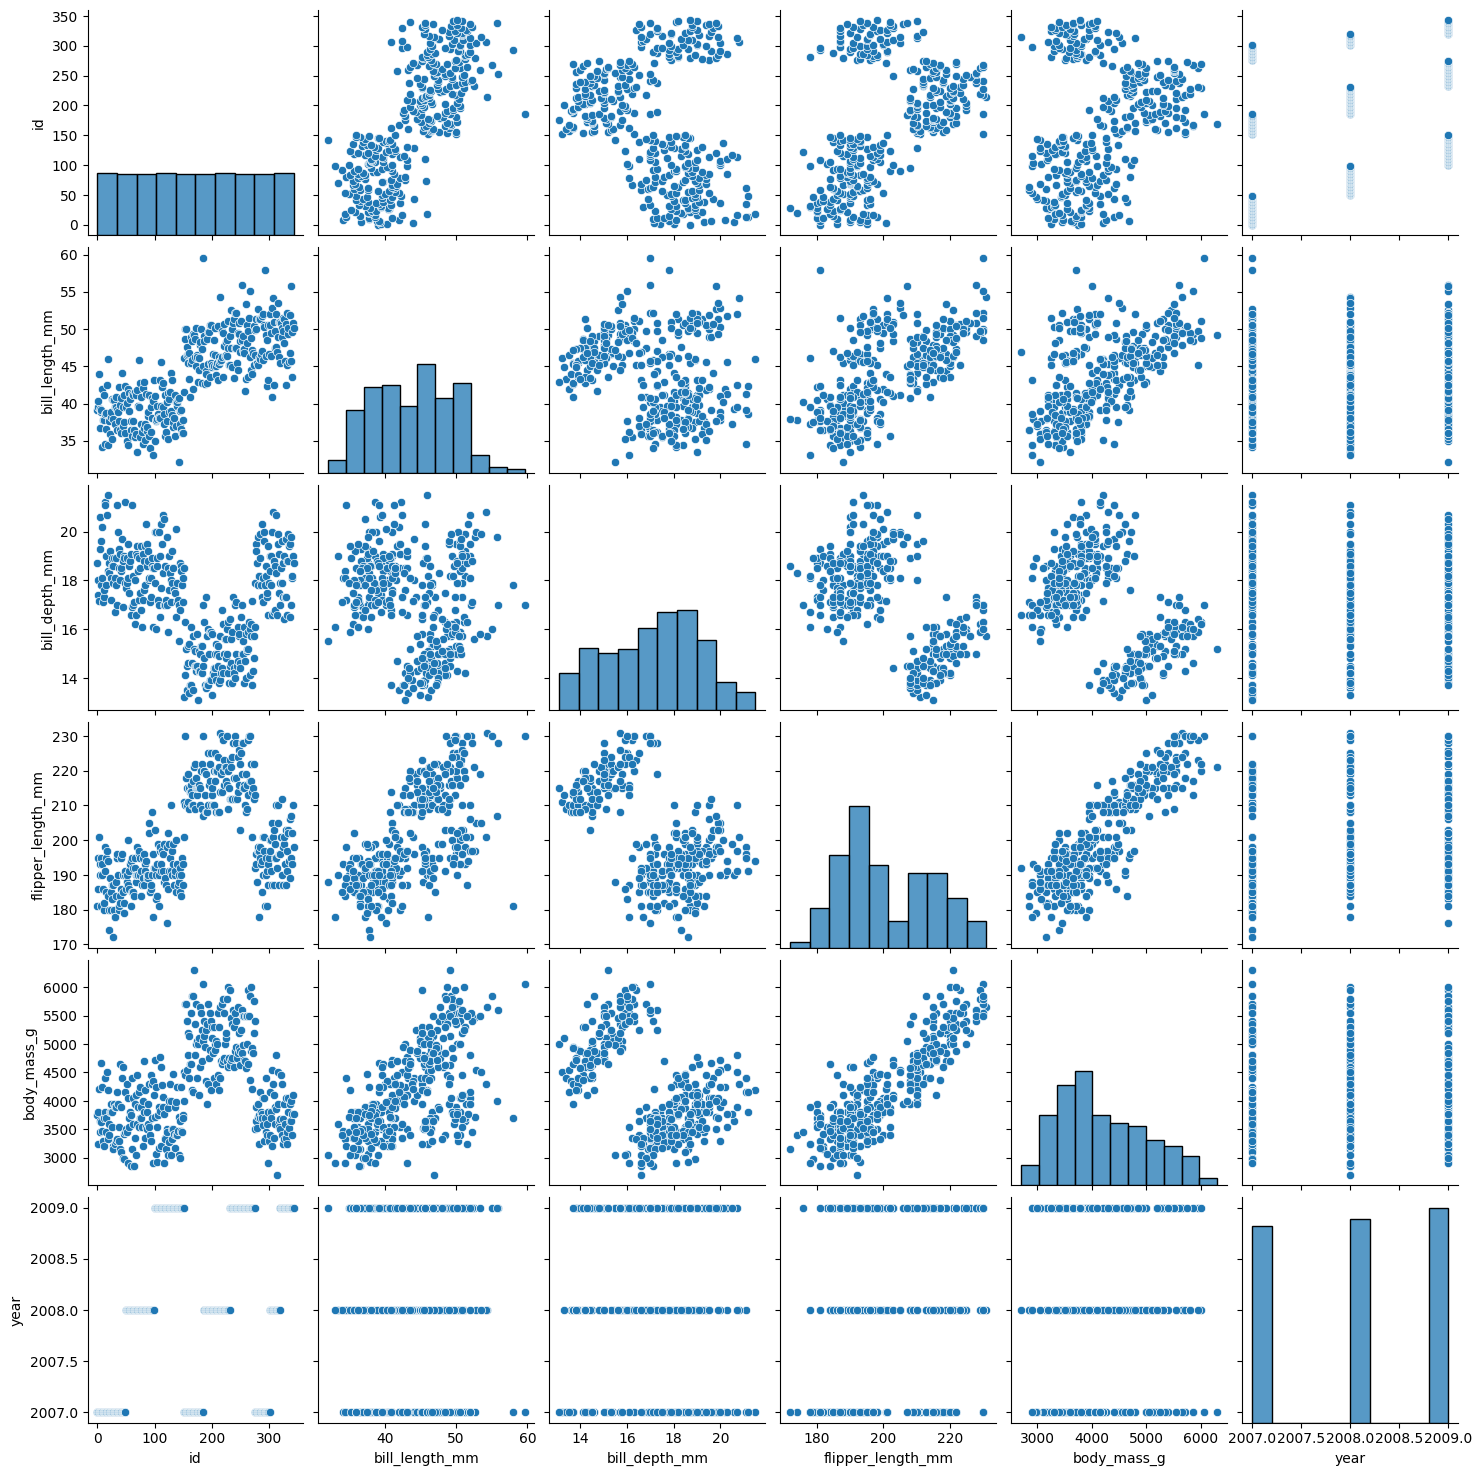

In [29]:
sns.pairplot(df[num_cols])
plt.show()

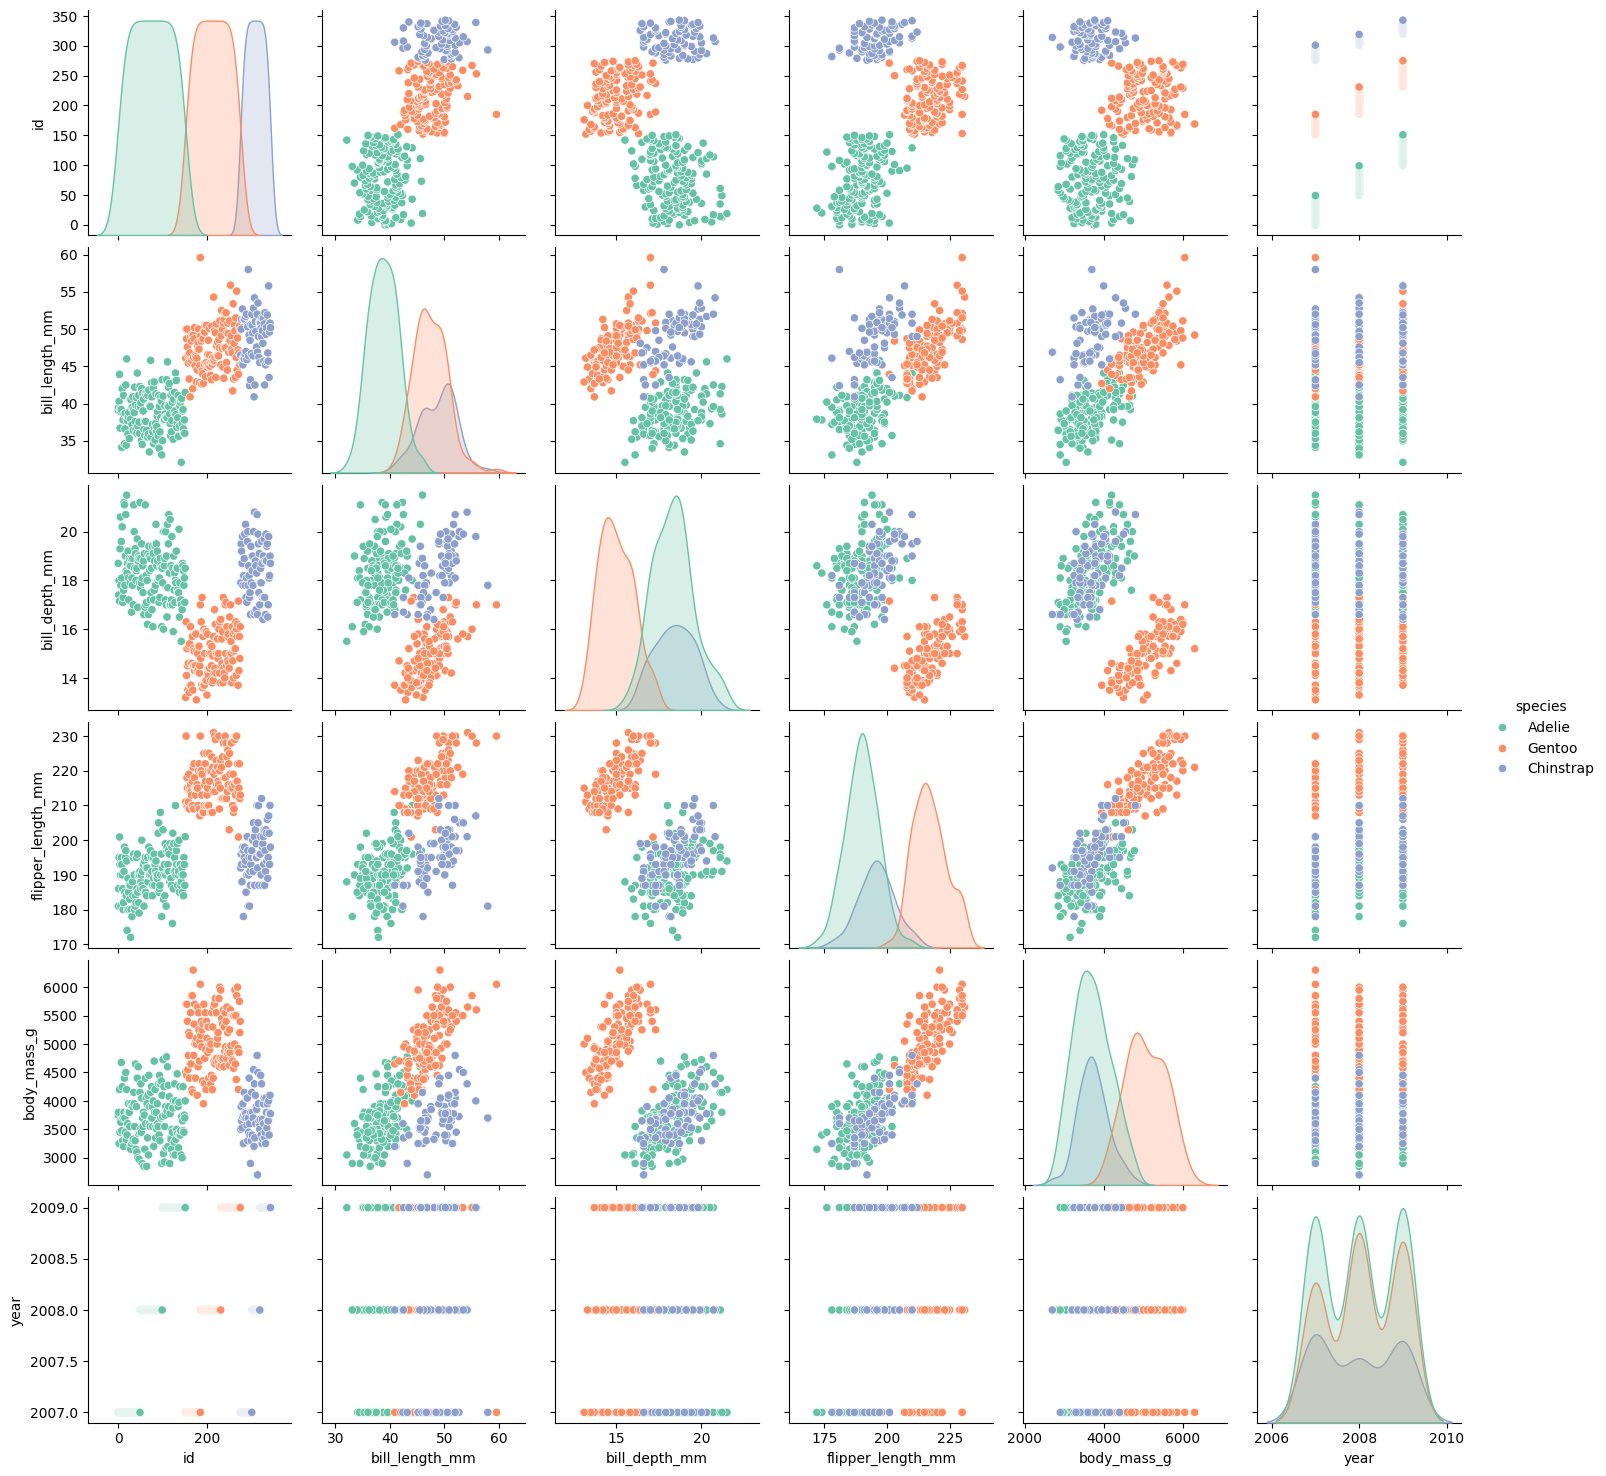

In [32]:
sns.pairplot(df[num_cols + ['species']], hue='species', palette="Set2", diag_kind="kde")
plt.show()

## Correlation and Heatmap

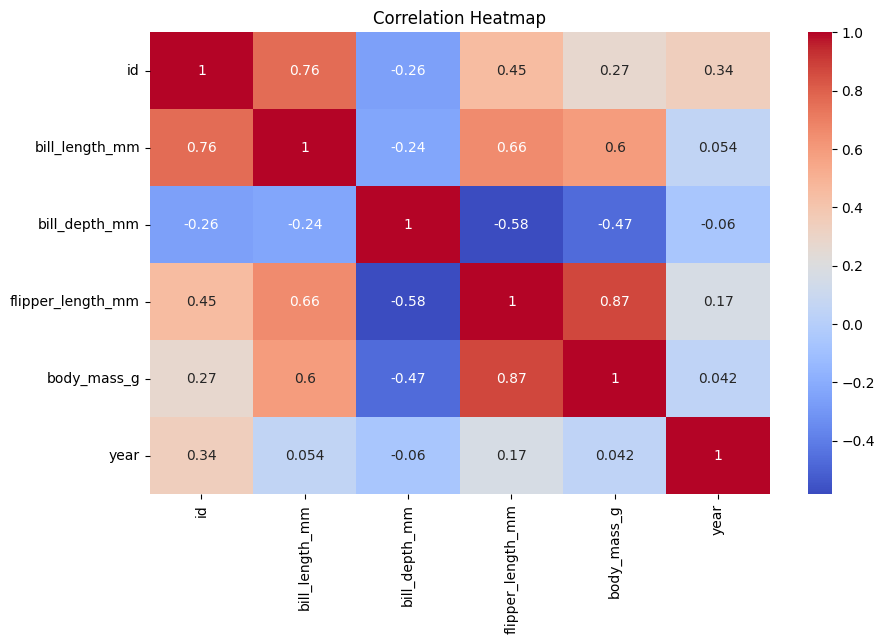

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Normalisation and Scaling

In [36]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

         id species     island  bill_length_mm  bill_depth_mm  \
0 -1.727023  Adelie  Torgersen   -8.870812e-01   7.877425e-01   
1 -1.716953  Adelie  Torgersen   -8.134940e-01   1.265563e-01   
2 -1.706883  Adelie  Torgersen   -6.663195e-01   4.317192e-01   
3 -1.696813  Adelie  Torgersen   -1.504744e-16  -4.131062e-16   
4 -1.686743  Adelie  Torgersen   -1.328605e+00   1.092905e+00   

   flipper_length_mm   body_mass_g     sex      year  
0      -1.422488e+00 -5.657892e-01    male -1.259316  
1      -1.065352e+00 -5.031679e-01  female -1.259316  
2      -4.225067e-01 -1.192003e+00  female -1.259316  
3       8.262125e-16 -8.262125e-17    male -1.259316  
4      -5.653611e-01 -9.415172e-01  female -1.259316  


In [37]:
df = pd.get_dummies(df, drop_first=True)

print(df.head())

         id  bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g  \
0 -1.727023   -8.870812e-01   7.877425e-01      -1.422488e+00 -5.657892e-01   
1 -1.716953   -8.134940e-01   1.265563e-01      -1.065352e+00 -5.031679e-01   
2 -1.706883   -6.663195e-01   4.317192e-01      -4.225067e-01 -1.192003e+00   
3 -1.696813   -1.504744e-16  -4.131062e-16       8.262125e-16 -8.262125e-17   
4 -1.686743   -1.328605e+00   1.092905e+00      -5.653611e-01 -9.415172e-01   

       year  species_Chinstrap  species_Gentoo  island_Dream  \
0 -1.259316              False           False         False   
1 -1.259316              False           False         False   
2 -1.259316              False           False         False   
3 -1.259316              False           False         False   
4 -1.259316              False           False         False   

   island_Torgersen  sex_male  
0              True      True  
1              True     False  
2              True     False  
3           